In [1]:
#from keras.datasets import mnist
import matplotlib.pyplot as plt
#import cv2
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
# Read the data...
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

In [3]:
# Split data the X - Our data , and y - the prdict label
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [5]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [6]:
# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

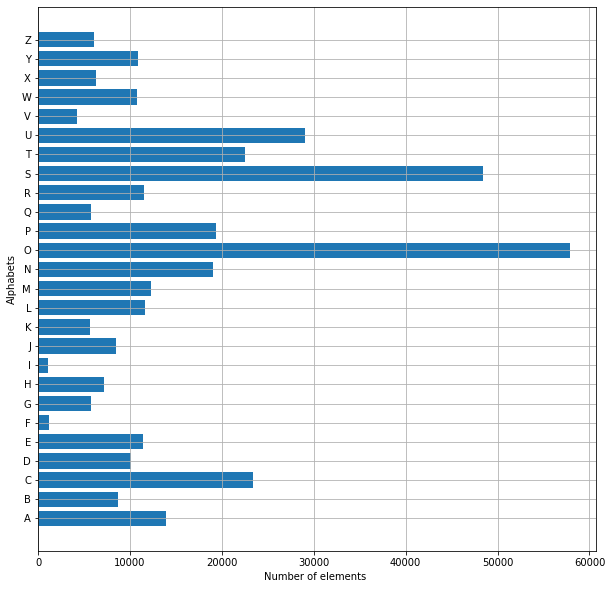

In [7]:
# Plotting the number of alphabets in the dataset...

train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

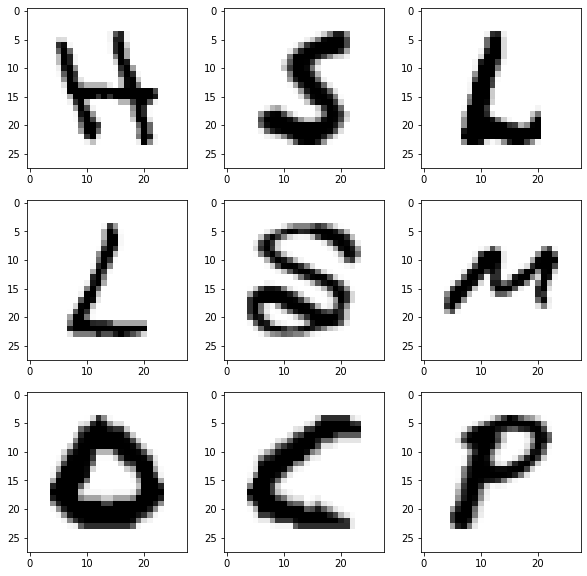

In [8]:
#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()


In [9]:
#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [10]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [11]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [22]:
history = model.fit(train_X, train_yOHE, epochs=5, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))
model.save(r'model_hand.h5')

Epoch 1/5


 307/9312 [..............................] - ETA: 0s - loss: 0.0070 - accuracy: 1.00 - ETA: 4:23 - loss: 0.0526 - accuracy: 0.97 - ETA: 5:20 - loss: 0.0683 - accuracy: 0.97 - ETA: 5:36 - loss: 0.0848 - accuracy: 0.96 - ETA: 5:53 - loss: 0.0822 - accuracy: 0.97 - ETA: 6:00 - loss: 0.0833 - accuracy: 0.96 - ETA: 6:13 - loss: 0.0764 - accuracy: 0.97 - ETA: 6:12 - loss: 0.0812 - accuracy: 0.96 - ETA: 6:15 - loss: 0.0707 - accuracy: 0.97 - ETA: 6:16 - loss: 0.0655 - accuracy: 0.97 - ETA: 6:17 - loss: 0.0706 - accuracy: 0.97 - ETA: 6:19 - loss: 0.0660 - accuracy: 0.97 - ETA: 6:18 - loss: 0.0623 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0606 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0617 - accuracy: 0.97 - ETA: 6:23 - loss: 0.0595 - accuracy: 0.97 - ETA: 6:27 - loss: 0.0585 - accuracy: 0.98 - ETA: 6:25 - loss: 0.0556 - accuracy: 0.98 - ETA: 6:29 - loss: 0.0551 - accuracy: 0.98 - ETA: 6:29 - loss: 0.0595 - accuracy: 0.98 - ETA: 6:28 - loss: 0.0675 - accuracy: 0.97 - ETA: 6:27 - loss: 0.0680 - accura

 569/9312 [>.............................] - ETA: 6:44 - loss: 0.0716 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0715 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0722 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0718 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0722 - accuracy: 0.97 - ETA: 6:45 - loss: 0.0724 - accuracy: 0.97 - ETA: 6:45 - loss: 0.0722 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0724 - accuracy: 0.97 - ETA: 6:45 - loss: 0.0728 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0725 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0733 - accuracy: 0.97 - ETA: 6:45 - loss: 0.0733 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0737 - accuracy: 0.97 - ETA: 6:45 - loss: 0.0734 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0746 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0752 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0757 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0756 - accuracy: 0.97 - ETA: 6:43 - loss: 0.0754 - accuracy: 0.97 - ETA: 6:44 - loss: 0.0752 - accuracy: 0.97 - ETA: 6:43 - loss: 0.0749 - accuracy: 0.97 - ETA: 6:43 - loss: 0.0747 - accu

 823/9312 [=>............................] - ETA: 6:52 - loss: 0.0828 - accuracy: 0.97 - ETA: 6:52 - loss: 0.0827 - accuracy: 0.97 - ETA: 6:52 - loss: 0.0828 - accuracy: 0.97 - ETA: 6:52 - loss: 0.0828 - accuracy: 0.97 - ETA: 6:52 - loss: 0.0827 - accuracy: 0.97 - ETA: 6:52 - loss: 0.0826 - accuracy: 0.97 - ETA: 6:52 - loss: 0.0825 - accuracy: 0.97 - ETA: 6:52 - loss: 0.0824 - accuracy: 0.97 - ETA: 6:52 - loss: 0.0822 - accuracy: 0.97 - ETA: 6:51 - loss: 0.0822 - accuracy: 0.97 - ETA: 6:51 - loss: 0.0822 - accuracy: 0.97 - ETA: 6:51 - loss: 0.0821 - accuracy: 0.97 - ETA: 6:51 - loss: 0.0823 - accuracy: 0.97 - ETA: 6:51 - loss: 0.0821 - accuracy: 0.97 - ETA: 6:51 - loss: 0.0821 - accuracy: 0.97 - ETA: 6:51 - loss: 0.0822 - accuracy: 0.97 - ETA: 6:51 - loss: 0.0822 - accuracy: 0.97 - ETA: 6:50 - loss: 0.0820 - accuracy: 0.97 - ETA: 6:50 - loss: 0.0822 - accuracy: 0.97 - ETA: 6:50 - loss: 0.0822 - accuracy: 0.97 - ETA: 6:50 - loss: 0.0820 - accuracy: 0.97 - ETA: 6:50 - loss: 0.0819 - accu

1151/9312 [==>...........................] - ETA: 6:47 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:47 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:47 - loss: 0.0775 - accuracy: 0.97 - ETA: 6:47 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:47 - loss: 0.0774 - accuracy: 0.97 - ETA: 6:47 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:47 - loss: 0.0775 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0775 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0776 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0775 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0774 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0775 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0774 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0774 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0772 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0771 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0776 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0776 - accuracy: 0.97 - ETA: 6:46 - loss: 0.0779 - accu

1508/9312 [===>..........................] - ETA: 6:23 - loss: 0.0765 - accuracy: 0.97 - ETA: 6:23 - loss: 0.0766 - accuracy: 0.97 - ETA: 6:22 - loss: 0.0769 - accuracy: 0.97 - ETA: 6:22 - loss: 0.0768 - accuracy: 0.97 - ETA: 6:22 - loss: 0.0770 - accuracy: 0.97 - ETA: 6:22 - loss: 0.0769 - accuracy: 0.97 - ETA: 6:22 - loss: 0.0769 - accuracy: 0.97 - ETA: 6:22 - loss: 0.0769 - accuracy: 0.97 - ETA: 6:22 - loss: 0.0769 - accuracy: 0.97 - ETA: 6:21 - loss: 0.0768 - accuracy: 0.97 - ETA: 6:21 - loss: 0.0772 - accuracy: 0.97 - ETA: 6:21 - loss: 0.0771 - accuracy: 0.97 - ETA: 6:21 - loss: 0.0771 - accuracy: 0.97 - ETA: 6:21 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:21 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0772 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0771 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0772 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0773 - accuracy: 0.97 - ETA: 6:19 - loss: 0.0772 - accu

1861/9312 [====>.........................] - ETA: 5:57 - loss: 0.0767 - accuracy: 0.97 - ETA: 5:57 - loss: 0.0767 - accuracy: 0.97 - ETA: 5:57 - loss: 0.0768 - accuracy: 0.97 - ETA: 5:57 - loss: 0.0767 - accuracy: 0.97 - ETA: 5:56 - loss: 0.0766 - accuracy: 0.97 - ETA: 5:56 - loss: 0.0767 - accuracy: 0.97 - ETA: 5:56 - loss: 0.0766 - accuracy: 0.97 - ETA: 5:56 - loss: 0.0766 - accuracy: 0.97 - ETA: 5:56 - loss: 0.0766 - accuracy: 0.97 - ETA: 5:56 - loss: 0.0766 - accuracy: 0.97 - ETA: 5:56 - loss: 0.0766 - accuracy: 0.97 - ETA: 5:55 - loss: 0.0765 - accuracy: 0.97 - ETA: 5:55 - loss: 0.0764 - accuracy: 0.97 - ETA: 5:55 - loss: 0.0763 - accuracy: 0.97 - ETA: 5:55 - loss: 0.0762 - accuracy: 0.97 - ETA: 5:55 - loss: 0.0762 - accuracy: 0.97 - ETA: 5:55 - loss: 0.0763 - accuracy: 0.97 - ETA: 5:55 - loss: 0.0763 - accuracy: 0.97 - ETA: 5:55 - loss: 0.0763 - accuracy: 0.97 - ETA: 5:55 - loss: 0.0762 - accuracy: 0.97 - ETA: 5:54 - loss: 0.0762 - accuracy: 0.97 - ETA: 5:54 - loss: 0.0763 - accu

2201/9312 [======>.......................] - ETA: 5:35 - loss: 0.0760 - accuracy: 0.97 - ETA: 5:35 - loss: 0.0760 - accuracy: 0.97 - ETA: 5:35 - loss: 0.0760 - accuracy: 0.97 - ETA: 5:35 - loss: 0.0760 - accuracy: 0.97 - ETA: 5:35 - loss: 0.0759 - accuracy: 0.97 - ETA: 5:35 - loss: 0.0759 - accuracy: 0.97 - ETA: 5:35 - loss: 0.0759 - accuracy: 0.97 - ETA: 5:35 - loss: 0.0759 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0758 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0758 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0760 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0760 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0760 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0761 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0761 - accuracy: 0.97 - ETA: 5:34 - loss: 0.0763 - accuracy: 0.97 - ETA: 5:33 - loss: 0.0762 - accuracy: 0.97 - ETA: 5:33 - loss: 0.0763 - accuracy: 0.97 - ETA: 5:33 - loss: 0.0762 - accuracy: 0.97 - ETA: 5:33 - loss: 0.0762 - accuracy: 0.97 - ETA: 5:33 - loss: 0.0761 - accuracy: 0.97 - ETA: 5:33 - loss: 0.0761 - accu

2543/9312 [=======>......................] - ETA: 5:18 - loss: 0.0756 - accuracy: 0.97 - ETA: 5:18 - loss: 0.0756 - accuracy: 0.97 - ETA: 5:17 - loss: 0.0756 - accuracy: 0.97 - ETA: 5:17 - loss: 0.0755 - accuracy: 0.97 - ETA: 5:17 - loss: 0.0755 - accuracy: 0.97 - ETA: 5:17 - loss: 0.0755 - accuracy: 0.97 - ETA: 5:17 - loss: 0.0754 - accuracy: 0.97 - ETA: 5:17 - loss: 0.0754 - accuracy: 0.97 - ETA: 5:17 - loss: 0.0753 - accuracy: 0.97 - ETA: 5:17 - loss: 0.0754 - accuracy: 0.97 - ETA: 5:17 - loss: 0.0753 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0753 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0753 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0753 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0752 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0752 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0751 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0751 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0751 - accuracy: 0.97 - ETA: 5:16 - loss: 0.0750 - accuracy: 0.97 - ETA: 5:15 - loss: 0.0751 - accuracy: 0.97 - ETA: 5:15 - loss: 0.0751 - accu

2895/9312 [========>.....................] - ETA: 5:00 - loss: 0.0750 - accuracy: 0.97 - ETA: 5:00 - loss: 0.0752 - accuracy: 0.97 - ETA: 5:00 - loss: 0.0752 - accuracy: 0.97 - ETA: 5:00 - loss: 0.0751 - accuracy: 0.97 - ETA: 5:00 - loss: 0.0751 - accuracy: 0.97 - ETA: 5:00 - loss: 0.0751 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0751 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0751 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0751 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0752 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0752 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0753 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0753 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0753 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0753 - accuracy: 0.97 - ETA: 4:59 - loss: 0.0753 - accuracy: 0.97 - ETA: 4:58 - loss: 0.0754 - accuracy: 0.97 - ETA: 4:58 - loss: 0.0753 - accuracy: 0.97 - ETA: 4:58 - loss: 0.0754 - accuracy: 0.97 - ETA: 4:58 - loss: 0.0754 - accuracy: 0.97 - ETA: 4:58 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:58 - loss: 0.0755 - accu

3232/9312 [=========>....................] - ETA: 4:43 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:43 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:43 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:43 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:43 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0758 - accuracy: 0.97 - ETA: 4:41 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:41 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:41 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:41 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:41 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:41 - loss: 0.0758 - accu

3571/9312 [==========>...................] - ETA: 4:27 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:27 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:27 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:27 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:27 - loss: 0.0757 - accuracy: 0.97 - ETA: 4:27 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:27 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:26 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:25 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:25 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:25 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:25 - loss: 0.0754 - accu

3836/9312 [===========>..................] - ETA: 4:12 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:12 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:12 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:12 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:12 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:12 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:12 - loss: 0.0756 - accuracy: 0.97 - ETA: 4:12 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0754 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0754 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0755 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0754 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0754 - accuracy: 0.97 - ETA: 4:11 - loss: 0.0754 - accu

4185/9312 [============>.................] - ETA: 4:02 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:02 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:02 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:02 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:02 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:02 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:02 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:01 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:00 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:00 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:00 - loss: 0.0748 - accu

4542/9312 [=============>................] - ETA: 3:46 - loss: 0.0743 - accuracy: 0.97 - ETA: 3:46 - loss: 0.0743 - accuracy: 0.97 - ETA: 3:46 - loss: 0.0743 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0743 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:45 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:44 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:44 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:44 - loss: 0.0743 - accuracy: 0.97 - ETA: 3:44 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:44 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:44 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:44 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:44 - loss: 0.0743 - accuracy: 0.97 - ETA: 3:44 - loss: 0.0742 - accu

4890/9312 [==============>...............] - ETA: 3:29 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:29 - loss: 0.0742 - accuracy: 0.97 - ETA: 3:29 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:29 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:29 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:29 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:29 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0740 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0740 - accuracy: 0.97 - ETA: 3:28 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:27 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:27 - loss: 0.0740 - accuracy: 0.97 - ETA: 3:27 - loss: 0.0740 - accu

5172/9312 [===============>..............] - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0746 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0746 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0746 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:13 - loss: 0.0745 - accuracy: 0.97 - ETA: 3:12 - loss: 0.0746 - accuracy: 0.97 - ETA: 3:12 - loss: 0.0746 - accuracy: 0.97 - ETA: 3:12 - loss: 0.0746 - accuracy: 0.97 - ETA: 3:12 - loss: 0.0746 - accuracy: 0.97 - ETA: 3:12 - loss: 0.0746 - accuracy: 0.97 - ETA: 3:12 - loss: 0.0746 - accuracy: 0.97 - ETA: 3:12 - loss: 0.0746 - accu

5482/9312 [================>.............] - ETA: 3:02 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:02 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:02 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0740 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0740 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:00 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:00 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:00 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:00 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:00 - loss: 0.0741 - accuracy: 0.97 - ETA: 3:00 - loss: 0.0741 - accu

5788/9312 [=================>............] - ETA: 2:48 - loss: 0.0739 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:48 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0738 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0737 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0737 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0737 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0737 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0737 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0737 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0737 - accuracy: 0.97 - ETA: 2:47 - loss: 0.0737 - accu

6123/9312 [==================>...........] - ETA: 2:35 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:35 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0729 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0729 - accuracy: 0.97 - ETA: 2:34 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:33 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:33 - loss: 0.0730 - accu

6444/9312 [===================>..........] - ETA: 2:20 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:20 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:20 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:20 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:20 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:20 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:20 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0731 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:19 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:18 - loss: 0.0730 - accuracy: 0.97 - ETA: 2:18 - loss: 0.0731 - accu

6792/9312 [====================>.........] - ETA: 2:06 - loss: 0.0732 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0732 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0732 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0734 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0733 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0733 - accu

7131/9312 [=====================>........] - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0726 - accu

7464/9312 [=======================>......] - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:35 - loss: 0.0725 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0725 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0724 - accuracy: 0.97 - ETA: 1:34 - loss: 0.0724 - accu

7815/9312 [========================>.....] - ETA: 1:21 - loss: 0.0725 - accuracy: 0.97 - ETA: 1:21 - loss: 0.0725 - accuracy: 0.97 - ETA: 1:21 - loss: 0.0725 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0725 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0725 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0725 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0725 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0726 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0727 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0727 - accu

8161/9312 [=========================>....] - ETA: 1:05 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0722 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:03 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:03 - loss: 0.0721 - accuracy: 0.97 - ETA: 1:03 - loss: 0.0721 - accu

8507/9312 [==========================>...] - ETA: 50s - loss: 0.0721 - accuracy: 0.979 - ETA: 50s - loss: 0.0721 - accuracy: 0.979 - ETA: 50s - loss: 0.0721 - accuracy: 0.979 - ETA: 50s - loss: 0.0721 - accuracy: 0.979 - ETA: 50s - loss: 0.0721 - accuracy: 0.979 - ETA: 50s - loss: 0.0720 - accuracy: 0.979 - ETA: 49s - loss: 0.0721 - accuracy: 0.979 - ETA: 49s - loss: 0.0721 - accuracy: 0.979 - ETA: 49s - loss: 0.0720 - accuracy: 0.979 - ETA: 49s - loss: 0.0720 - accuracy: 0.979 - ETA: 49s - loss: 0.0721 - accuracy: 0.979 - ETA: 49s - loss: 0.0721 - accuracy: 0.979 - ETA: 49s - loss: 0.0721 - accuracy: 0.979 - ETA: 49s - loss: 0.0721 - accuracy: 0.979 - ETA: 49s - loss: 0.0721 - accuracy: 0.979 - ETA: 49s - loss: 0.0721 - accuracy: 0.979 - ETA: 49s - loss: 0.0721 - accuracy: 0.979 - ETA: 48s - loss: 0.0721 - accuracy: 0.979 - ETA: 48s - loss: 0.0721 - accuracy: 0.979 - ETA: 48s - loss: 0.0721 - accuracy: 0.979 - ETA: 48s - loss: 0.0721 - accuracy: 0.979 - ETA: 48s - loss: 0.0721 - accur

8839/9312 [===========================>..] - ETA: 35s - loss: 0.0721 - accuracy: 0.979 - ETA: 35s - loss: 0.0721 - accuracy: 0.979 - ETA: 35s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0721 - accuracy: 0.979 - ETA: 34s - loss: 0.0722 - accuracy: 0.979 - ETA: 34s - loss: 0.0722 - accuracy: 0.979 - ETA: 33s - loss: 0.0722 - accuracy: 0.979 - ETA: 33s - loss: 0.0722 - accuracy: 0.979 - ETA: 33s - loss: 0.0722 - accuracy: 0.979 - ETA: 33s - loss: 0.0722 - accuracy: 0.979 - ETA: 33s - loss: 0.0722 - accuracy: 0.979 - ETA: 33s - loss: 0.0722 - accuracy: 0.979 - ETA: 33s - loss: 0.0721 - accuracy: 0.979 - ETA: 33s - loss: 0.0721 - accur

9167/9312 [============================>.] - ETA: 20s - loss: 0.0718 - accuracy: 0.979 - ETA: 20s - loss: 0.0718 - accuracy: 0.979 - ETA: 20s - loss: 0.0718 - accuracy: 0.979 - ETA: 20s - loss: 0.0718 - accuracy: 0.979 - ETA: 20s - loss: 0.0718 - accuracy: 0.979 - ETA: 20s - loss: 0.0718 - accuracy: 0.979 - ETA: 20s - loss: 0.0718 - accuracy: 0.979 - ETA: 20s - loss: 0.0718 - accuracy: 0.979 - ETA: 20s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0718 - accuracy: 0.979 - ETA: 19s - loss: 0.0719 - accuracy: 0.979 - ETA: 19s - loss: 0.0719 - accuracy: 0.979 - ETA: 18s - loss: 0.0719 - accur

9312/9312 [==============================] - ETA: 6s - loss: 0.0719 - accuracy: 0.97 - ETA: 6s - loss: 0.0719 - accuracy: 0.97 - ETA: 6s - loss: 0.0719 - accuracy: 0.97 - ETA: 6s - loss: 0.0719 - accuracy: 0.97 - ETA: 6s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 5s - loss: 0.0718 - accuracy: 0.97 - ETA: 4s - loss: 0.0718 - accuracy: 0.97 - ETA: 4s - loss: 0.0717 - accuracy: 0.97 - ETA: 4s - loss: 0.0717 - accuracy: 0.97 - ETA: 4s - loss: 0.0717 - accuracy: 0.97 - ETA: 4s - loss: 0.0717 - accuracy: 0.97 - ETA: 4s - loss: 0.0717 - accuracy: 0.97 - ETA: 4s - loss: 0.0717 - accura

 256/9312 [..............................] - ETA: 0s - loss: 0.0167 - accuracy: 1.00 - ETA: 4:25 - loss: 0.0192 - accuracy: 1.00 - ETA: 5:53 - loss: 0.0595 - accuracy: 0.98 - ETA: 6:33 - loss: 0.0471 - accuracy: 0.99 - ETA: 6:38 - loss: 0.0694 - accuracy: 0.98 - ETA: 6:49 - loss: 0.0614 - accuracy: 0.98 - ETA: 6:59 - loss: 0.0595 - accuracy: 0.98 - ETA: 6:57 - loss: 0.0560 - accuracy: 0.98 - ETA: 7:09 - loss: 0.0516 - accuracy: 0.98 - ETA: 7:19 - loss: 0.0475 - accuracy: 0.98 - ETA: 7:14 - loss: 0.0463 - accuracy: 0.98 - ETA: 7:10 - loss: 0.0422 - accuracy: 0.98 - ETA: 7:13 - loss: 0.0400 - accuracy: 0.98 - ETA: 7:17 - loss: 0.0501 - accuracy: 0.98 - ETA: 7:14 - loss: 0.0622 - accuracy: 0.98 - ETA: 7:19 - loss: 0.0619 - accuracy: 0.98 - ETA: 7:20 - loss: 0.0599 - accuracy: 0.98 - ETA: 7:19 - loss: 0.0635 - accuracy: 0.98 - ETA: 7:21 - loss: 0.0624 - accuracy: 0.98 - ETA: 7:23 - loss: 0.0600 - accuracy: 0.98 - ETA: 7:25 - loss: 0.0581 - accuracy: 0.98 - ETA: 7:23 - loss: 0.0675 - accura

 552/9312 [>.............................] - ETA: 7:19 - loss: 0.0491 - accuracy: 0.98 - ETA: 7:19 - loss: 0.0488 - accuracy: 0.98 - ETA: 7:18 - loss: 0.0484 - accuracy: 0.98 - ETA: 7:18 - loss: 0.0482 - accuracy: 0.98 - ETA: 7:17 - loss: 0.0484 - accuracy: 0.98 - ETA: 7:17 - loss: 0.0481 - accuracy: 0.98 - ETA: 7:16 - loss: 0.0479 - accuracy: 0.98 - ETA: 7:16 - loss: 0.0476 - accuracy: 0.98 - ETA: 7:15 - loss: 0.0477 - accuracy: 0.98 - ETA: 7:15 - loss: 0.0493 - accuracy: 0.98 - ETA: 7:15 - loss: 0.0492 - accuracy: 0.98 - ETA: 7:15 - loss: 0.0494 - accuracy: 0.98 - ETA: 7:15 - loss: 0.0492 - accuracy: 0.98 - ETA: 7:15 - loss: 0.0493 - accuracy: 0.98 - ETA: 7:14 - loss: 0.0495 - accuracy: 0.98 - ETA: 7:14 - loss: 0.0503 - accuracy: 0.98 - ETA: 7:14 - loss: 0.0501 - accuracy: 0.98 - ETA: 7:13 - loss: 0.0513 - accuracy: 0.98 - ETA: 7:14 - loss: 0.0520 - accuracy: 0.98 - ETA: 7:13 - loss: 0.0520 - accuracy: 0.98 - ETA: 7:13 - loss: 0.0518 - accuracy: 0.98 - ETA: 7:12 - loss: 0.0516 - accu

 816/9312 [=>............................] - ETA: 6:51 - loss: 0.0574 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0573 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0573 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0572 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0573 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0578 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0577 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0576 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0574 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0574 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0573 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0572 - accuracy: 0.98 - ETA: 6:51 - loss: 0.0571 - accuracy: 0.98 - ETA: 6:50 - loss: 0.0571 - accuracy: 0.98 - ETA: 6:50 - loss: 0.0569 - accuracy: 0.98 - ETA: 6:50 - loss: 0.0568 - accuracy: 0.98 - ETA: 6:50 - loss: 0.0569 - accuracy: 0.98 - ETA: 6:50 - loss: 0.0573 - accuracy: 0.98 - ETA: 6:50 - loss: 0.0573 - accuracy: 0.98 - ETA: 6:50 - loss: 0.0572 - accuracy: 0.98 - ETA: 6:50 - loss: 0.0572 - accuracy: 0.98 - ETA: 6:50 - loss: 0.0572 - accu

1125/9312 [==>...........................] - ETA: 6:45 - loss: 0.0558 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0557 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0557 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0556 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0555 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0557 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0560 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0559 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0561 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0561 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0560 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0568 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0567 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0566 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0567 - accuracy: 0.98 - ETA: 6:44 - loss: 0.0567 - accuracy: 0.98 - ETA: 6:44 - loss: 0.0567 - accuracy: 0.98 - ETA: 6:44 - loss: 0.0567 - accuracy: 0.98 - ETA: 6:44 - loss: 0.0566 - accuracy: 0.98 - ETA: 6:44 - loss: 0.0566 - accuracy: 0.98 - ETA: 6:44 - loss: 0.0565 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0565 - accu

1430/9312 [===>..........................] - ETA: 6:25 - loss: 0.0588 - accuracy: 0.98 - ETA: 6:25 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:24 - loss: 0.0588 - accuracy: 0.98 - ETA: 6:24 - loss: 0.0588 - accuracy: 0.98 - ETA: 6:24 - loss: 0.0588 - accuracy: 0.98 - ETA: 6:24 - loss: 0.0588 - accuracy: 0.98 - ETA: 6:24 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:24 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:24 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:24 - loss: 0.0586 - accuracy: 0.98 - ETA: 6:24 - loss: 0.0586 - accuracy: 0.98 - ETA: 6:23 - loss: 0.0585 - accuracy: 0.98 - ETA: 6:23 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:23 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:23 - loss: 0.0586 - accuracy: 0.98 - ETA: 6:23 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:23 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:23 - loss: 0.0586 - accuracy: 0.98 - ETA: 6:23 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:22 - loss: 0.0587 - accuracy: 0.98 - ETA: 6:22 - loss: 0.0590 - accuracy: 0.98 - ETA: 6:22 - loss: 0.0592 - accu

1761/9312 [====>.........................] - ETA: 6:07 - loss: 0.0606 - accuracy: 0.98 - ETA: 6:07 - loss: 0.0606 - accuracy: 0.98 - ETA: 6:07 - loss: 0.0606 - accuracy: 0.98 - ETA: 6:07 - loss: 0.0605 - accuracy: 0.98 - ETA: 6:07 - loss: 0.0604 - accuracy: 0.98 - ETA: 6:06 - loss: 0.0604 - accuracy: 0.98 - ETA: 6:06 - loss: 0.0603 - accuracy: 0.98 - ETA: 6:06 - loss: 0.0603 - accuracy: 0.98 - ETA: 6:06 - loss: 0.0603 - accuracy: 0.98 - ETA: 6:06 - loss: 0.0603 - accuracy: 0.98 - ETA: 6:06 - loss: 0.0604 - accuracy: 0.98 - ETA: 6:06 - loss: 0.0606 - accuracy: 0.98 - ETA: 6:06 - loss: 0.0606 - accuracy: 0.98 - ETA: 6:05 - loss: 0.0607 - accuracy: 0.98 - ETA: 6:05 - loss: 0.0606 - accuracy: 0.98 - ETA: 6:05 - loss: 0.0606 - accuracy: 0.98 - ETA: 6:05 - loss: 0.0606 - accuracy: 0.98 - ETA: 6:05 - loss: 0.0607 - accuracy: 0.98 - ETA: 6:05 - loss: 0.0608 - accuracy: 0.98 - ETA: 6:05 - loss: 0.0608 - accuracy: 0.98 - ETA: 6:05 - loss: 0.0608 - accuracy: 0.98 - ETA: 6:04 - loss: 0.0608 - accu

2081/9312 [=====>........................] - ETA: 5:47 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0605 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0605 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0603 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0605 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0605 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0605 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0604 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0605 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0605 - accu

2424/9312 [======>.......................] - ETA: 5:30 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:30 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:30 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:30 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:30 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:30 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:30 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:30 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:29 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:29 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:29 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:29 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:29 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:29 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:29 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:29 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:28 - loss: 0.0606 - accuracy: 0.98 - ETA: 5:28 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:28 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:28 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:28 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:28 - loss: 0.0607 - accu

2771/9312 [=======>......................] - ETA: 5:12 - loss: 0.0609 - accuracy: 0.98 - ETA: 5:12 - loss: 0.0609 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0609 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0609 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0609 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0609 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0609 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:11 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0607 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:10 - loss: 0.0608 - accuracy: 0.98 - ETA: 5:09 - loss: 0.0607 - accu

3132/9312 [=========>....................] - ETA: 4:53 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:53 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0606 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0605 - accu

3481/9312 [==========>...................] - ETA: 4:35 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0602 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0602 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0602 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:33 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:33 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:33 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:33 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:33 - loss: 0.0604 - accu

3836/9312 [===========>..................] - ETA: 4:18 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:18 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:18 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:18 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:18 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:18 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:18 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:18 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0603 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0605 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:16 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:16 - loss: 0.0604 - accuracy: 0.98 - ETA: 4:16 - loss: 0.0604 - accu

4150/9312 [============>.................] - ETA: 4:01 - loss: 0.0608 - accuracy: 0.98 - ETA: 4:01 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:01 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:01 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:01 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:01 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:01 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:01 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0609 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0608 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0608 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0608 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0608 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0608 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0608 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0607 - accuracy: 0.98 - ETA: 4:00 - loss: 0.0607 - accuracy: 0.98 - ETA: 3:59 - loss: 0.0607 - accuracy: 0.98 - ETA: 3:59 - loss: 0.0607 - accuracy: 0.98 - ETA: 3:59 - loss: 0.0607 - accu

4481/9312 [=============>................] - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0607 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:46 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:46 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:46 - loss: 0.0607 - accuracy: 0.98 - ETA: 3:46 - loss: 0.0607 - accu

4836/9312 [==============>...............] - ETA: 3:33 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0608 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0609 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0610 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0610 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0610 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0610 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0610 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0610 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0610 - accu

5192/9312 [===============>..............] - ETA: 3:16 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0616 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:14 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:14 - loss: 0.0615 - accuracy: 0.98 - ETA: 3:14 - loss: 0.0615 - accu

5540/9312 [================>.............] - ETA: 3:00 - loss: 0.0617 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0617 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0617 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0617 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0617 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0615 - accu

5897/9312 [=================>............] - ETA: 2:44 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0619 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0619 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0619 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0618 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0618 - accu

6254/9312 [===================>..........] - ETA: 2:28 - loss: 0.0617 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0616 - accu

6609/9312 [====================>.........] - ETA: 2:13 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0616 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:12 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accuracy: 0.98 - ETA: 2:11 - loss: 0.0615 - accu

6954/9312 [=====================>........] - ETA: 1:57 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:57 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:57 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:57 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:57 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:56 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:55 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:55 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:55 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:55 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:55 - loss: 0.0612 - accu

7303/9312 [======================>.......] - ETA: 1:42 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0611 - accu

7651/9312 [=======================>......] - ETA: 1:27 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0614 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0613 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0612 - accu

8005/9312 [========================>.....] - ETA: 1:11 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0611 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0612 - accu

8362/9312 [=========================>....] - ETA: 56s - loss: 0.0608 - accuracy: 0.983 - ETA: 56s - loss: 0.0608 - accuracy: 0.983 - ETA: 56s - loss: 0.0608 - accuracy: 0.983 - ETA: 56s - loss: 0.0608 - accuracy: 0.983 - ETA: 56s - loss: 0.0608 - accuracy: 0.983 - ETA: 56s - loss: 0.0608 - accuracy: 0.983 - ETA: 55s - loss: 0.0608 - accuracy: 0.983 - ETA: 55s - loss: 0.0608 - accuracy: 0.983 - ETA: 55s - loss: 0.0609 - accuracy: 0.983 - ETA: 55s - loss: 0.0609 - accuracy: 0.983 - ETA: 55s - loss: 0.0609 - accuracy: 0.983 - ETA: 55s - loss: 0.0608 - accuracy: 0.983 - ETA: 55s - loss: 0.0608 - accuracy: 0.983 - ETA: 55s - loss: 0.0608 - accuracy: 0.983 - ETA: 55s - loss: 0.0608 - accuracy: 0.983 - ETA: 55s - loss: 0.0608 - accuracy: 0.983 - ETA: 55s - loss: 0.0609 - accuracy: 0.983 - ETA: 55s - loss: 0.0608 - accuracy: 0.983 - ETA: 54s - loss: 0.0609 - accuracy: 0.983 - ETA: 54s - loss: 0.0609 - accuracy: 0.983 - ETA: 54s - loss: 0.0608 - accuracy: 0.983 - ETA: 54s - loss: 0.0608 - accur

8708/9312 [===========================>..] - ETA: 40s - loss: 0.0608 - accuracy: 0.983 - ETA: 40s - loss: 0.0608 - accuracy: 0.983 - ETA: 40s - loss: 0.0608 - accuracy: 0.983 - ETA: 40s - loss: 0.0608 - accuracy: 0.983 - ETA: 40s - loss: 0.0608 - accuracy: 0.983 - ETA: 40s - loss: 0.0608 - accuracy: 0.983 - ETA: 40s - loss: 0.0608 - accuracy: 0.983 - ETA: 40s - loss: 0.0608 - accuracy: 0.983 - ETA: 40s - loss: 0.0608 - accuracy: 0.983 - ETA: 40s - loss: 0.0609 - accuracy: 0.983 - ETA: 40s - loss: 0.0609 - accuracy: 0.983 - ETA: 40s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accuracy: 0.983 - ETA: 39s - loss: 0.0609 - accur

9028/9312 [============================>.] - ETA: 26s - loss: 0.0607 - accuracy: 0.983 - ETA: 25s - loss: 0.0607 - accuracy: 0.983 - ETA: 25s - loss: 0.0607 - accuracy: 0.983 - ETA: 25s - loss: 0.0607 - accuracy: 0.983 - ETA: 25s - loss: 0.0607 - accuracy: 0.983 - ETA: 25s - loss: 0.0607 - accuracy: 0.983 - ETA: 25s - loss: 0.0607 - accuracy: 0.983 - ETA: 25s - loss: 0.0607 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 25s - loss: 0.0606 - accuracy: 0.983 - ETA: 24s - loss: 0.0606 - accuracy: 0.983 - ETA: 24s - loss: 0.0606 - accuracy: 0.983 - ETA: 24s - loss: 0.0606 - accur

9312/9312 [==============================] - ETA: 12s - loss: 0.0607 - accuracy: 0.983 - ETA: 12s - loss: 0.0607 - accuracy: 0.983 - ETA: 12s - loss: 0.0607 - accuracy: 0.983 - ETA: 11s - loss: 0.0607 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 11s - loss: 0.0606 - accuracy: 0.983 - ETA: 10s - loss: 0.0606 - accuracy: 0.983 - ETA: 10s - loss: 0.0606 - accuracy: 0.983 - ETA: 10s - loss: 0.0606 - accuracy: 0.983 - ETA: 10s - loss: 0.0606 - accuracy: 0.983 - ETA: 10s - loss: 0.0606 - accuracy: 0.983 - ETA: 10s - loss: 0.0606 - accur

 353/9312 [>.............................] - ETA: 0s - loss: 0.0771 - accuracy: 0.96 - ETA: 4:32 - loss: 0.0338 - accuracy: 0.98 - ETA: 5:21 - loss: 0.0836 - accuracy: 0.98 - ETA: 5:33 - loss: 0.0722 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0562 - accuracy: 0.98 - ETA: 5:52 - loss: 0.0522 - accuracy: 0.98 - ETA: 5:57 - loss: 0.0581 - accuracy: 0.98 - ETA: 6:01 - loss: 0.0612 - accuracy: 0.98 - ETA: 6:06 - loss: 0.0563 - accuracy: 0.98 - ETA: 6:08 - loss: 0.0523 - accuracy: 0.98 - ETA: 6:09 - loss: 0.0478 - accuracy: 0.98 - ETA: 6:14 - loss: 0.0459 - accuracy: 0.98 - ETA: 6:14 - loss: 0.0462 - accuracy: 0.98 - ETA: 6:14 - loss: 0.0428 - accuracy: 0.98 - ETA: 6:18 - loss: 0.0422 - accuracy: 0.98 - ETA: 6:17 - loss: 0.0431 - accuracy: 0.98 - ETA: 6:18 - loss: 0.0411 - accuracy: 0.98 - ETA: 6:18 - loss: 0.0400 - accuracy: 0.98 - ETA: 6:18 - loss: 0.0377 - accuracy: 0.98 - ETA: 6:19 - loss: 0.0362 - accuracy: 0.98 - ETA: 6:18 - loss: 0.0366 - accuracy: 0.98 - ETA: 6:19 - loss: 0.0389 - accura

 698/9312 [=>............................] - ETA: 6:16 - loss: 0.0446 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0444 - accuracy: 0.98 - ETA: 6:17 - loss: 0.0443 - accuracy: 0.98 - ETA: 6:17 - loss: 0.0444 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0450 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0452 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0450 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0451 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0452 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0454 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0454 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0455 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0459 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0457 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0455 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0453 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0461 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0463 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0466 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0464 - accuracy: 0.98 - ETA: 6:14 - loss: 0.0464 - accuracy: 0.98 - ETA: 6:14 - loss: 0.0468 - accu

1056/9312 [==>...........................] - ETA: 6:04 - loss: 0.0509 - accuracy: 0.98 - ETA: 6:04 - loss: 0.0508 - accuracy: 0.98 - ETA: 6:04 - loss: 0.0506 - accuracy: 0.98 - ETA: 6:04 - loss: 0.0506 - accuracy: 0.98 - ETA: 6:04 - loss: 0.0506 - accuracy: 0.98 - ETA: 6:04 - loss: 0.0506 - accuracy: 0.98 - ETA: 6:04 - loss: 0.0507 - accuracy: 0.98 - ETA: 6:04 - loss: 0.0506 - accuracy: 0.98 - ETA: 6:03 - loss: 0.0508 - accuracy: 0.98 - ETA: 6:03 - loss: 0.0508 - accuracy: 0.98 - ETA: 6:03 - loss: 0.0506 - accuracy: 0.98 - ETA: 6:03 - loss: 0.0505 - accuracy: 0.98 - ETA: 6:03 - loss: 0.0504 - accuracy: 0.98 - ETA: 6:03 - loss: 0.0505 - accuracy: 0.98 - ETA: 6:03 - loss: 0.0508 - accuracy: 0.98 - ETA: 6:03 - loss: 0.0507 - accuracy: 0.98 - ETA: 6:03 - loss: 0.0507 - accuracy: 0.98 - ETA: 6:02 - loss: 0.0507 - accuracy: 0.98 - ETA: 6:02 - loss: 0.0508 - accuracy: 0.98 - ETA: 6:02 - loss: 0.0509 - accuracy: 0.98 - ETA: 6:02 - loss: 0.0508 - accuracy: 0.98 - ETA: 6:02 - loss: 0.0508 - accu

1340/9312 [===>..........................] - ETA: 5:48 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0495 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0495 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0496 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0497 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0496 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0497 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0499 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0498 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0499 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0499 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0500 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0500 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0500 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0500 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0505 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0505 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0505 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0505 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0504 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0504 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0503 - accu

1572/9312 [====>.........................] - ETA: 5:43 - loss: 0.0524 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0524 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0524 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0524 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0523 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0523 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0523 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0522 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0523 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0522 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0522 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0523 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0524 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0527 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0526 - accu

1910/9312 [=====>........................] - ETA: 5:43 - loss: 0.0529 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0528 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0528 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0527 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0526 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0531 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0533 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0533 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0533 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0533 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0533 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0533 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0531 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0532 - accu

2260/9312 [======>.......................] - ETA: 5:26 - loss: 0.0531 - accuracy: 0.98 - ETA: 5:26 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:26 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:26 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:26 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:26 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0533 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0534 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0534 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0535 - accuracy: 0.98 - ETA: 5:25 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:24 - loss: 0.0536 - accuracy: 0.98 - ETA: 5:24 - loss: 0.0536 - accu

2601/9312 [=======>......................] - ETA: 5:09 - loss: 0.0527 - accuracy: 0.98 - ETA: 5:09 - loss: 0.0527 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0527 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0527 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0528 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0528 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0528 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:08 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0530 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0531 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0531 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0531 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:07 - loss: 0.0532 - accuracy: 0.98 - ETA: 5:06 - loss: 0.0533 - accu

2946/9312 [========>.....................] - ETA: 4:52 - loss: 0.0523 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0524 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0523 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0523 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0523 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0522 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0522 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0522 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0523 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0525 - accuracy: 0.98 - ETA: 4:52 - loss: 0.0524 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0524 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0524 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0525 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0526 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0526 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0526 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0528 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0528 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0528 - accu

3281/9312 [=========>....................] - ETA: 4:37 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0529 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0529 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0530 - accu

3636/9312 [==========>...................] - ETA: 4:22 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:22 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:22 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:22 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:22 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:22 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:20 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:20 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:20 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:20 - loss: 0.0531 - accuracy: 0.98 - ETA: 4:20 - loss: 0.0530 - accuracy: 0.98 - ETA: 4:20 - loss: 0.0531 - accu

3979/9312 [===========>..................] - ETA: 4:06 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:06 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:06 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:06 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0528 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0528 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0528 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0528 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0527 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0526 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0526 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0526 - accu

4257/9312 [============>.................] - ETA: 3:51 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0527 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0528 - accu

4529/9312 [=============>................] - ETA: 3:41 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0536 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0536 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0535 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0535 - accu

4819/9312 [==============>...............] - ETA: 3:30 - loss: 0.0537 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0537 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0537 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0537 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:29 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:29 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:29 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:29 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:29 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:29 - loss: 0.0538 - accu

5180/9312 [===============>..............] - ETA: 3:19 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:19 - loss: 0.0542 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0542 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0541 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0541 - accu

5538/9312 [================>.............] - ETA: 3:01 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0538 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0539 - accu

5859/9312 [=================>............] - ETA: 2:45 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:45 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:45 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0540 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0539 - accu

6213/9312 [===================>..........] - ETA: 2:31 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0539 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0538 - accu

6571/9312 [====================>.........] - ETA: 2:15 - loss: 0.0536 - accuracy: 0.98 - ETA: 2:15 - loss: 0.0535 - accuracy: 0.98 - ETA: 2:15 - loss: 0.0536 - accuracy: 0.98 - ETA: 2:15 - loss: 0.0536 - accuracy: 0.98 - ETA: 2:15 - loss: 0.0536 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0536 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0536 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0537 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0537 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0537 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0537 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0537 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0537 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0537 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:14 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:13 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:13 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:13 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:13 - loss: 0.0538 - accuracy: 0.98 - ETA: 2:13 - loss: 0.0538 - accu

6909/9312 [=====================>........] - ETA: 1:59 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0538 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:58 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:57 - loss: 0.0539 - accu

7272/9312 [======================>.......] - ETA: 1:44 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0542 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0541 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0541 - accu

7588/9312 [=======================>......] - ETA: 1:28 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:28 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0540 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0540 - accu

7935/9312 [========================>.....] - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0545 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0546 - accu

8290/9312 [=========================>....] - ETA: 59s - loss: 0.0550 - accuracy: 0.984 - ETA: 59s - loss: 0.0550 - accuracy: 0.984 - ETA: 59s - loss: 0.0551 - accuracy: 0.984 - ETA: 59s - loss: 0.0551 - accuracy: 0.984 - ETA: 59s - loss: 0.0551 - accuracy: 0.984 - ETA: 59s - loss: 0.0551 - accuracy: 0.984 - ETA: 59s - loss: 0.0551 - accuracy: 0.984 - ETA: 59s - loss: 0.0551 - accuracy: 0.984 - ETA: 59s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0551 - accuracy: 0.984 - ETA: 58s - loss: 0.0550 - accur

8586/9312 [==========================>...] - ETA: 44s - loss: 0.0546 - accuracy: 0.985 - ETA: 44s - loss: 0.0546 - accuracy: 0.985 - ETA: 44s - loss: 0.0546 - accuracy: 0.985 - ETA: 44s - loss: 0.0546 - accuracy: 0.985 - ETA: 44s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0545 - accuracy: 0.985 - ETA: 43s - loss: 0.0545 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 43s - loss: 0.0546 - accuracy: 0.985 - ETA: 42s - loss: 0.0546 - accuracy: 0.985 - ETA: 42s - loss: 0.0546 - accuracy: 0.985 - ETA: 42s - loss: 0.0546 - accuracy: 0.984 - ETA: 42s - loss: 0.0546 - accuracy: 0.985 - ETA: 42s - loss: 0.0546 - accur

8875/9312 [===========================>..] - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 31s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accuracy: 0.984 - ETA: 30s - loss: 0.0550 - accur

9216/9312 [============================>.] - ETA: 19s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 18s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accuracy: 0.984 - ETA: 17s - loss: 0.0549 - accur

9312/9312 [==============================] - ETA: 4s - loss: 0.0548 - accuracy: 0.98 - ETA: 4s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0547 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 3s - loss: 0.0548 - accuracy: 0.98 - ETA: 2s - loss: 0.0547 - accuracy: 0.98 - ETA: 2s - loss: 0.0547 - accuracy: 0.98 - ETA: 2s - loss: 0.0547 - accuracy: 0.98 - ETA: 2s - loss: 0.0547 - accuracy: 0.98 - ETA: 2s - loss: 0.0547 - accura

 299/9312 [..............................] - ETA: 0s - loss: 0.3836 - accuracy: 0.93 - ETA: 4:32 - loss: 0.1326 - accuracy: 0.97 - ETA: 5:29 - loss: 0.1001 - accuracy: 0.98 - ETA: 5:53 - loss: 0.0738 - accuracy: 0.98 - ETA: 6:13 - loss: 0.0736 - accuracy: 0.98 - ETA: 6:21 - loss: 0.0659 - accuracy: 0.98 - ETA: 6:28 - loss: 0.0607 - accuracy: 0.98 - ETA: 6:32 - loss: 0.0532 - accuracy: 0.98 - ETA: 6:37 - loss: 0.0584 - accuracy: 0.98 - ETA: 6:41 - loss: 0.0633 - accuracy: 0.98 - ETA: 6:44 - loss: 0.0577 - accuracy: 0.98 - ETA: 6:44 - loss: 0.0578 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0592 - accuracy: 0.98 - ETA: 6:46 - loss: 0.0567 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0527 - accuracy: 0.98 - ETA: 6:45 - loss: 0.0508 - accuracy: 0.98 - ETA: 6:46 - loss: 0.0489 - accuracy: 0.98 - ETA: 6:46 - loss: 0.0505 - accuracy: 0.98 - ETA: 6:46 - loss: 0.0482 - accuracy: 0.98 - ETA: 6:46 - loss: 0.0458 - accuracy: 0.98 - ETA: 6:47 - loss: 0.0473 - accuracy: 0.98 - ETA: 6:48 - loss: 0.0492 - accura

 560/9312 [>.............................] - ETA: 6:58 - loss: 0.0413 - accuracy: 0.98 - ETA: 6:57 - loss: 0.0411 - accuracy: 0.98 - ETA: 6:57 - loss: 0.0409 - accuracy: 0.98 - ETA: 6:57 - loss: 0.0414 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0414 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0411 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0412 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0417 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0415 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0414 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0413 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0414 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0411 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0423 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0422 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0421 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0420 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0419 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0418 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0415 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0414 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0414 - accu

 920/9312 [=>............................] - ETA: 6:55 - loss: 0.0414 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0413 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0412 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0416 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0416 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0416 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0415 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0415 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0415 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0414 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0413 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0416 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0416 - accuracy: 0.98 - ETA: 6:56 - loss: 0.0415 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0417 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0416 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0416 - accuracy: 0.98 - ETA: 6:55 - loss: 0.0415 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0415 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0420 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0422 - accuracy: 0.98 - ETA: 6:54 - loss: 0.0422 - accu

1289/9312 [===>..........................] - ETA: 6:13 - loss: 0.0468 - accuracy: 0.98 - ETA: 6:13 - loss: 0.0467 - accuracy: 0.98 - ETA: 6:13 - loss: 0.0467 - accuracy: 0.98 - ETA: 6:13 - loss: 0.0467 - accuracy: 0.98 - ETA: 6:12 - loss: 0.0466 - accuracy: 0.98 - ETA: 6:12 - loss: 0.0466 - accuracy: 0.98 - ETA: 6:12 - loss: 0.0466 - accuracy: 0.98 - ETA: 6:12 - loss: 0.0468 - accuracy: 0.98 - ETA: 6:12 - loss: 0.0468 - accuracy: 0.98 - ETA: 6:11 - loss: 0.0468 - accuracy: 0.98 - ETA: 6:11 - loss: 0.0469 - accuracy: 0.98 - ETA: 6:11 - loss: 0.0468 - accuracy: 0.98 - ETA: 6:11 - loss: 0.0468 - accuracy: 0.98 - ETA: 6:11 - loss: 0.0469 - accuracy: 0.98 - ETA: 6:10 - loss: 0.0470 - accuracy: 0.98 - ETA: 6:10 - loss: 0.0471 - accuracy: 0.98 - ETA: 6:10 - loss: 0.0472 - accuracy: 0.98 - ETA: 6:10 - loss: 0.0472 - accuracy: 0.98 - ETA: 6:10 - loss: 0.0472 - accuracy: 0.98 - ETA: 6:09 - loss: 0.0471 - accuracy: 0.98 - ETA: 6:09 - loss: 0.0471 - accuracy: 0.98 - ETA: 6:09 - loss: 0.0471 - accu

1645/9312 [====>.........................] - ETA: 5:44 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0494 - accu

1952/9312 [=====>........................] - ETA: 5:24 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:24 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:23 - loss: 0.0492 - accu

2244/9312 [======>.......................] - ETA: 5:14 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0489 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0489 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0489 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0488 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0488 - accuracy: 0.98 - ETA: 5:14 - loss: 0.0488 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0489 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0489 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0489 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0490 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:13 - loss: 0.0491 - accu

2568/9312 [=======>......................] - ETA: 5:05 - loss: 0.0491 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:05 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0494 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0493 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0492 - accuracy: 0.98 - ETA: 5:04 - loss: 0.0492 - accu

2909/9312 [========>.....................] - ETA: 4:51 - loss: 0.0497 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0497 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0497 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0497 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0497 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0497 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0497 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0497 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0496 - accuracy: 0.98 - ETA: 4:51 - loss: 0.0496 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0496 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0496 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0496 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0496 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0495 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0495 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0495 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0495 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0495 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0495 - accuracy: 0.98 - ETA: 4:50 - loss: 0.0494 - accu

3193/9312 [=========>....................] - ETA: 4:37 - loss: 0.0491 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0490 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0490 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0490 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0490 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0490 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0490 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0490 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0490 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0490 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0489 - accu

3535/9312 [==========>...................] - ETA: 4:26 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:26 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:26 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:26 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:26 - loss: 0.0495 - accuracy: 0.98 - ETA: 4:26 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:26 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:26 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0492 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:25 - loss: 0.0492 - accu

3886/9312 [===========>..................] - ETA: 4:10 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0494 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0493 - accuracy: 0.98 - ETA: 4:08 - loss: 0.0492 - accuracy: 0.98 - ETA: 4:08 - loss: 0.0493 - accu

4201/9312 [============>.................] - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0496 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0496 - accu

4559/9312 [=============>................] - ETA: 3:41 - loss: 0.0496 - accuracy: 0.98 - ETA: 3:41 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:41 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:41 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:41 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:41 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0494 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0494 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0495 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0495 - accu

4918/9312 [==============>...............] - ETA: 3:25 - loss: 0.0498 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0498 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0498 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0498 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0498 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0498 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0498 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0498 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0496 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0496 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0497 - accu

5287/9312 [================>.............] - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0499 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0499 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:07 - loss: 0.0500 - accuracy: 0.98 - ETA: 3:07 - loss: 0.0500 - accu

5656/9312 [=================>............] - ETA: 2:52 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0501 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0501 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0501 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0501 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0501 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0501 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0501 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0501 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0502 - accuracy: 0.98 - ETA: 2:50 - loss: 0.0502 - accu

6018/9312 [==================>...........] - ETA: 2:36 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0506 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0506 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0506 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0505 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0506 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0506 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0506 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0507 - accu

6388/9312 [===================>..........] - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:18 - loss: 0.0511 - accu

6757/9312 [====================>.........] - ETA: 2:04 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:04 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:03 - loss: 0.0512 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0511 - accuracy: 0.98 - ETA: 2:02 - loss: 0.0511 - accu

7125/9312 [=====================>........] - ETA: 1:48 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0516 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0517 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0516 - accu

7494/9312 [=======================>......] - ETA: 1:32 - loss: 0.0517 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0517 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0517 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0517 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0518 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:32 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:31 - loss: 0.0519 - accuracy: 0.98 - ETA: 1:30 - loss: 0.0519 - accu

7864/9312 [========================>.....] - ETA: 1:16 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0521 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0522 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0522 - accu

8236/9312 [=========================>....] - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0525 - accuracy: 0.98 - ETA: 59s - loss: 0.0525 - accuracy: 0.9857 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accuracy: 0.985 - ETA: 59s - loss: 0.0525 - accu

8608/9312 [==========================>...] - ETA: 45s - loss: 0.0527 - accuracy: 0.985 - ETA: 44s - loss: 0.0527 - accuracy: 0.985 - ETA: 44s - loss: 0.0527 - accuracy: 0.985 - ETA: 44s - loss: 0.0527 - accuracy: 0.985 - ETA: 44s - loss: 0.0527 - accuracy: 0.985 - ETA: 44s - loss: 0.0527 - accuracy: 0.985 - ETA: 44s - loss: 0.0527 - accuracy: 0.985 - ETA: 44s - loss: 0.0528 - accuracy: 0.985 - ETA: 44s - loss: 0.0528 - accuracy: 0.985 - ETA: 44s - loss: 0.0528 - accuracy: 0.985 - ETA: 44s - loss: 0.0527 - accuracy: 0.985 - ETA: 44s - loss: 0.0527 - accuracy: 0.985 - ETA: 43s - loss: 0.0527 - accuracy: 0.985 - ETA: 43s - loss: 0.0528 - accuracy: 0.985 - ETA: 43s - loss: 0.0528 - accuracy: 0.985 - ETA: 43s - loss: 0.0527 - accuracy: 0.985 - ETA: 43s - loss: 0.0527 - accuracy: 0.985 - ETA: 43s - loss: 0.0528 - accuracy: 0.985 - ETA: 43s - loss: 0.0528 - accuracy: 0.985 - ETA: 43s - loss: 0.0528 - accuracy: 0.985 - ETA: 43s - loss: 0.0528 - accuracy: 0.985 - ETA: 43s - loss: 0.0528 - accur

8980/9312 [===========================>..] - ETA: 29s - loss: 0.0525 - accuracy: 0.985 - ETA: 29s - loss: 0.0525 - accuracy: 0.985 - ETA: 29s - loss: 0.0525 - accuracy: 0.985 - ETA: 29s - loss: 0.0525 - accuracy: 0.985 - ETA: 28s - loss: 0.0525 - accuracy: 0.985 - ETA: 28s - loss: 0.0525 - accuracy: 0.985 - ETA: 28s - loss: 0.0525 - accuracy: 0.985 - ETA: 28s - loss: 0.0525 - accuracy: 0.985 - ETA: 28s - loss: 0.0525 - accuracy: 0.985 - ETA: 28s - loss: 0.0524 - accuracy: 0.985 - ETA: 28s - loss: 0.0524 - accuracy: 0.985 - ETA: 28s - loss: 0.0524 - accuracy: 0.985 - ETA: 28s - loss: 0.0524 - accuracy: 0.985 - ETA: 28s - loss: 0.0524 - accuracy: 0.985 - ETA: 28s - loss: 0.0524 - accuracy: 0.985 - ETA: 28s - loss: 0.0524 - accuracy: 0.985 - ETA: 27s - loss: 0.0524 - accuracy: 0.985 - ETA: 27s - loss: 0.0524 - accuracy: 0.985 - ETA: 27s - loss: 0.0524 - accuracy: 0.985 - ETA: 27s - loss: 0.0524 - accuracy: 0.985 - ETA: 27s - loss: 0.0525 - accuracy: 0.985 - ETA: 27s - loss: 0.0525 - accur

9312/9312 [==============================] - ETA: 13s - loss: 0.0532 - accuracy: 0.985 - ETA: 13s - loss: 0.0532 - accuracy: 0.985 - ETA: 13s - loss: 0.0532 - accuracy: 0.985 - ETA: 13s - loss: 0.0532 - accuracy: 0.985 - ETA: 13s - loss: 0.0532 - accuracy: 0.985 - ETA: 13s - loss: 0.0532 - accuracy: 0.985 - ETA: 13s - loss: 0.0532 - accuracy: 0.985 - ETA: 13s - loss: 0.0532 - accuracy: 0.985 - ETA: 13s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accuracy: 0.985 - ETA: 12s - loss: 0.0532 - accur

 356/9312 [>.............................] - ETA: 0s - loss: 0.1692 - accuracy: 0.93 - ETA: 3:58 - loss: 0.0596 - accuracy: 0.97 - ETA: 4:53 - loss: 0.0651 - accuracy: 0.98 - ETA: 5:16 - loss: 0.1116 - accuracy: 0.98 - ETA: 5:33 - loss: 0.1106 - accuracy: 0.98 - ETA: 5:41 - loss: 0.1089 - accuracy: 0.98 - ETA: 5:47 - loss: 0.1195 - accuracy: 0.98 - ETA: 5:52 - loss: 0.1165 - accuracy: 0.98 - ETA: 5:55 - loss: 0.1076 - accuracy: 0.98 - ETA: 5:54 - loss: 0.0966 - accuracy: 0.98 - ETA: 5:54 - loss: 0.0890 - accuracy: 0.98 - ETA: 5:55 - loss: 0.0814 - accuracy: 0.98 - ETA: 5:56 - loss: 0.0799 - accuracy: 0.98 - ETA: 5:55 - loss: 0.0745 - accuracy: 0.98 - ETA: 5:55 - loss: 0.0695 - accuracy: 0.98 - ETA: 5:55 - loss: 0.0666 - accuracy: 0.98 - ETA: 5:55 - loss: 0.0646 - accuracy: 0.98 - ETA: 5:55 - loss: 0.0658 - accuracy: 0.98 - ETA: 5:55 - loss: 0.0623 - accuracy: 0.98 - ETA: 5:55 - loss: 0.0592 - accuracy: 0.98 - ETA: 5:57 - loss: 0.0564 - accuracy: 0.98 - ETA: 5:56 - loss: 0.0540 - accura

 646/9312 [=>............................] - ETA: 6:04 - loss: 0.0357 - accuracy: 0.99 - ETA: 6:04 - loss: 0.0357 - accuracy: 0.99 - ETA: 6:04 - loss: 0.0357 - accuracy: 0.99 - ETA: 6:05 - loss: 0.0356 - accuracy: 0.99 - ETA: 6:05 - loss: 0.0355 - accuracy: 0.99 - ETA: 6:05 - loss: 0.0355 - accuracy: 0.99 - ETA: 6:05 - loss: 0.0353 - accuracy: 0.99 - ETA: 6:05 - loss: 0.0351 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0350 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0351 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0351 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0349 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0348 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0347 - accuracy: 0.99 - ETA: 6:05 - loss: 0.0346 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0348 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0350 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0349 - accuracy: 0.99 - ETA: 6:07 - loss: 0.0348 - accuracy: 0.99 - ETA: 6:07 - loss: 0.0349 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0348 - accuracy: 0.99 - ETA: 6:06 - loss: 0.0346 - accu

 981/9312 [==>...........................] - ETA: 6:13 - loss: 0.0325 - accuracy: 0.99 - ETA: 6:13 - loss: 0.0325 - accuracy: 0.99 - ETA: 6:13 - loss: 0.0326 - accuracy: 0.99 - ETA: 6:13 - loss: 0.0329 - accuracy: 0.99 - ETA: 6:12 - loss: 0.0329 - accuracy: 0.99 - ETA: 6:12 - loss: 0.0328 - accuracy: 0.99 - ETA: 6:12 - loss: 0.0327 - accuracy: 0.99 - ETA: 6:12 - loss: 0.0326 - accuracy: 0.99 - ETA: 6:12 - loss: 0.0326 - accuracy: 0.99 - ETA: 6:12 - loss: 0.0325 - accuracy: 0.99 - ETA: 6:12 - loss: 0.0325 - accuracy: 0.99 - ETA: 6:12 - loss: 0.0325 - accuracy: 0.99 - ETA: 6:12 - loss: 0.0328 - accuracy: 0.99 - ETA: 6:11 - loss: 0.0327 - accuracy: 0.99 - ETA: 6:11 - loss: 0.0327 - accuracy: 0.99 - ETA: 6:11 - loss: 0.0326 - accuracy: 0.99 - ETA: 6:11 - loss: 0.0326 - accuracy: 0.99 - ETA: 6:11 - loss: 0.0325 - accuracy: 0.99 - ETA: 6:11 - loss: 0.0325 - accuracy: 0.99 - ETA: 6:11 - loss: 0.0324 - accuracy: 0.99 - ETA: 6:11 - loss: 0.0323 - accuracy: 0.99 - ETA: 6:11 - loss: 0.0322 - accu

1335/9312 [===>..........................] - ETA: 5:58 - loss: 0.0295 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0295 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0295 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0294 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0294 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0294 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0294 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0293 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0296 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0296 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0295 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0295 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0294 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0294 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0293 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0293 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0292 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0292 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0292 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0292 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0292 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0292 - accu

1674/9312 [====>.........................] - ETA: 5:41 - loss: 0.0283 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0284 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0283 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0283 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0283 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0283 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0283 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0283 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0282 - accuracy: 0.99 - ETA: 5:41 - loss: 0.0282 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0282 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0281 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0281 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0282 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0281 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0281 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0281 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0280 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0280 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0280 - accuracy: 0.99 - ETA: 5:40 - loss: 0.0280 - accuracy: 0.99 - ETA: 5:39 - loss: 0.0280 - accu

2019/9312 [=====>........................] - ETA: 5:27 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0264 - accuracy: 0.99 - ETA: 5:26 - loss: 0.0264 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0264 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0264 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0264 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0263 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0264 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0264 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0263 - accuracy: 0.99 - ETA: 5:25 - loss: 0.0263 - accu

2324/9312 [======>.......................] - ETA: 5:12 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0268 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0269 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0269 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0269 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0268 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0268 - accuracy: 0.99 - ETA: 5:11 - loss: 0.0268 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0268 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0268 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0268 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0268 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:10 - loss: 0.0267 - accu

2605/9312 [=======>......................] - ETA: 5:01 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0265 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0268 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0267 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0266 - accuracy: 0.99 - ETA: 5:00 - loss: 0.0266 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0266 - accu

2930/9312 [========>.....................] - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0257 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0256 - accu

3239/9312 [=========>....................] - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0256 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0255 - accu

3524/9312 [==========>...................] - ETA: 4:25 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:25 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0251 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0252 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0251 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0251 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0251 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0251 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0251 - accuracy: 0.99 - ETA: 4:23 - loss: 0.0251 - accuracy: 0.99 - ETA: 4:23 - loss: 0.0251 - accuracy: 0.99 - ETA: 4:23 - loss: 0.0251 - accu

3824/9312 [===========>..................] - ETA: 4:14 - loss: 0.0249 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0249 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0249 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:13 - loss: 0.0247 - accuracy: 0.99 - ETA: 4:13 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:13 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:13 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:13 - loss: 0.0248 - accuracy: 0.99 - ETA: 4:13 - loss: 0.0248 - accu

4178/9312 [============>.................] - ETA: 4:02 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0245 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0245 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0245 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0246 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0245 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0245 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0245 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0245 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0245 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0245 - accuracy: 0.99 - ETA: 4:00 - loss: 0.0245 - accu

4529/9312 [=============>................] - ETA: 3:44 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0242 - accu

4857/9312 [==============>...............] - ETA: 3:29 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0245 - accu

5187/9312 [===============>..............] - ETA: 3:14 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0243 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0242 - accu

5480/9312 [================>.............] - ETA: 3:00 - loss: 0.0238 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0238 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0237 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0237 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0237 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0237 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0238 - accu

5761/9312 [=================>............] - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0235 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0235 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0235 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0236 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0235 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0235 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0235 - accu

6085/9312 [==================>...........] - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0233 - accu

6329/9312 [===================>..........] - ETA: 2:21 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0229 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0229 - accu

6585/9312 [====================>.........] - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0231 - accu

6802/9312 [====================>.........] - ETA: 2:01 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0230 - accu

7047/9312 [=====================>........] - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0230 - accu

7329/9312 [======================>.......] - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0229 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0229 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0228 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0228 - accu

7659/9312 [=======================>......] - ETA: 1:29 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0227 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0227 - accu

7956/9312 [========================>.....] - ETA: 1:14 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0226 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0226 - accu

8230/9312 [=========================>....] - ETA: 1:01 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0225 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0224 - accuracy: 0.99 - ETA: 59s - loss: 0.0224 - accuracy: 0.9936 - ETA: 59s - loss: 0.0224 - accu

8556/9312 [==========================>...] - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 48s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accuracy: 0.993 - ETA: 47s - loss: 0.0221 - accur

8872/9312 [===========================>..] - ETA: 34s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 33s - loss: 0.0220 - accuracy: 0.993 - ETA: 32s - loss: 0.0220 - accuracy: 0.993 - ETA: 32s - loss: 0.0220 - accuracy: 0.993 - ETA: 32s - loss: 0.0220 - accuracy: 0.993 - ETA: 32s - loss: 0.0220 - accuracy: 0.993 - ETA: 32s - loss: 0.0220 - accuracy: 0.993 - ETA: 32s - loss: 0.0220 - accuracy: 0.993 - ETA: 32s - loss: 0.0220 - accuracy: 0.993 - ETA: 32s - loss: 0.0220 - accuracy: 0.993 - ETA: 32s - loss: 0.0220 - accur

9185/9312 [============================>.] - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 19s - loss: 0.0219 - accuracy: 0.993 - ETA: 18s - loss: 0.0219 - accuracy: 0.993 - ETA: 18s - loss: 0.0219 - accuracy: 0.993 - ETA: 18s - loss: 0.0219 - accuracy: 0.993 - ETA: 18s - loss: 0.0220 - accuracy: 0.993 - ETA: 18s - loss: 0.0220 - accuracy: 0.993 - ETA: 18s - loss: 0.0220 - accuracy: 0.993 - ETA: 18s - loss: 0.0220 - accuracy: 0.993 - ETA: 18s - loss: 0.0220 - accuracy: 0.993 - ETA: 18s - loss: 0.0220 - accuracy: 0.993 - ETA: 18s - loss: 0.0220 - accuracy: 0.993 - ETA: 18s - loss: 0.0220 - accur

9312/9312 [==============================] - ETA: 5s - loss: 0.0217 - accuracy: 0.99 - ETA: 5s - loss: 0.0217 - accuracy: 0.99 - ETA: 5s - loss: 0.0217 - accuracy: 0.99 - ETA: 5s - loss: 0.0217 - accuracy: 0.99 - ETA: 5s - loss: 0.0217 - accuracy: 0.99 - ETA: 5s - loss: 0.0217 - accuracy: 0.99 - ETA: 5s - loss: 0.0217 - accuracy: 0.99 - ETA: 5s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 4s - loss: 0.0217 - accuracy: 0.99 - ETA: 3s - loss: 0.0217 - accuracy: 0.99 - ETA: 3s - loss: 0.0217 - accuracy: 0.99 - ETA: 3s - loss: 0.0217 - accuracy: 0.99 - ETA: 3s - loss: 0.0217 - accura

In [23]:
# Displaying the accuracies & losses for train & validation set...

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])


The validation accuracy is : [0.9805477261543274, 0.9851389527320862, 0.984051525592804, 0.9857833385467529, 0.9923882484436035]
The training accuracy is : [0.9798462986946106, 0.98322594165802, 0.9849778413772583, 0.9856927394866943, 0.9939253330230713]
The validation loss is : [0.07121118158102036, 0.0606682263314724, 0.06018076464533806, 0.06102268770337105, 0.03497736528515816]
The training loss is : [0.07177773863077164, 0.06099865958094597, 0.054764505475759506, 0.05312451347708702, 0.021612588316202164]


In [24]:
print(test_X.shape, test_y.shape)
test_y_new = test_y.to_numpy()
type(test_y_new)
type(test_X), test_X.shape

(74490, 28, 28, 1) (74490,)


(numpy.ndarray, (74490, 28, 28, 1))

In [25]:
# Evaluate the model on test set
score = model.evaluate(test_X, test_yOHE, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9923882484436035


In [26]:
#Making model predictions...

pred = model.predict(test_X[:9])
print(test_X.shape)

(74490, 28, 28, 1)


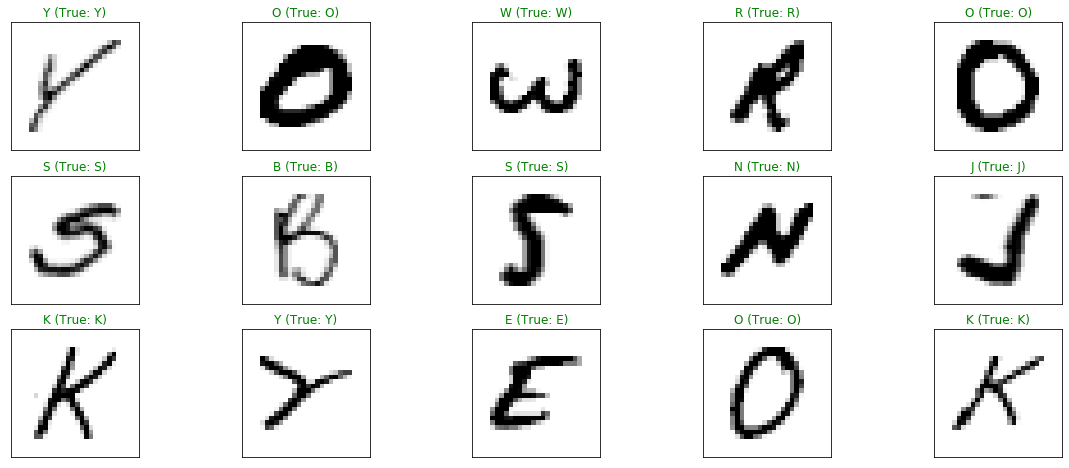

In [27]:
y_hat = model.predict(test_X)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_X.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_X[index]), cmap="Greys")
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(test_yOHE[index])
    # Set the title for each image
    ax.set_title("{} (True: {})".format(word_dict[predict_index], 
                                  word_dict[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [28]:
history.history

{'loss': [0.07177773863077164,
  0.06099865958094597,
  0.054764505475759506,
  0.05312451347708702,
  0.021612588316202164],
 'accuracy': [0.9798462986946106,
  0.98322594165802,
  0.9849778413772583,
  0.9856927394866943,
  0.9939253330230713],
 'val_loss': [0.07121118158102036,
  0.0606682263314724,
  0.06018076464533806,
  0.06102268770337105,
  0.03497736528515816],
 'val_accuracy': [0.9805477261543274,
  0.9851389527320862,
  0.984051525592804,
  0.9857833385467529,
  0.9923882484436035],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.00020000001]}



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


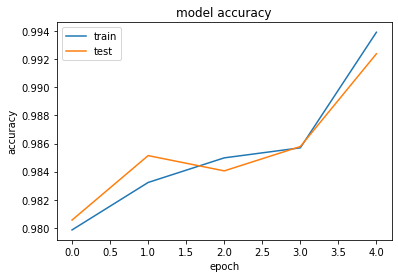

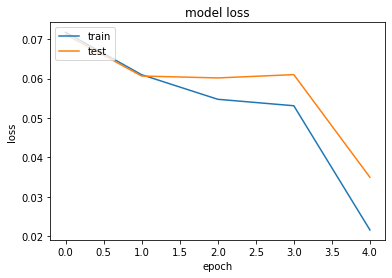

In [29]:
# plot learning curves

print("\n")
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

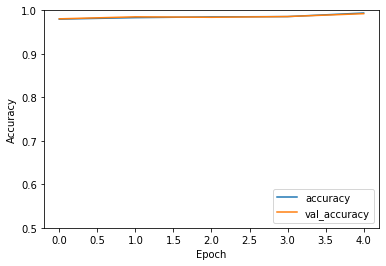

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_X, test_y_new, verbose=2)

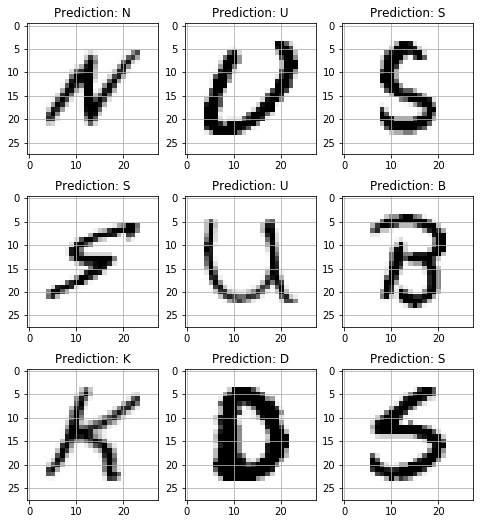

In [31]:
# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()